In [180]:
"""
First Order Estimation - Tclab

@author: Jeferson Gallego Chaverra
        Pedro Alejandro Sanchez Osorio
        Victor Alfonso Echeverri Moyano
"""
import numpy as np
import matplotlib.pyplot as plt
import control
from sklearn.metrics import *


def validar_Dato(frase):

    while True:
            valor= input(frase)     
            if valor.isnumeric():
                valor = int(valor)
                break
            else:
                print('El dato ingresado no es numerico , por favor ingresar un dato numerico')

    return valor

def limites(frase,minimo,maximo):    
    flag=True
    while flag:
        y=validar_Dato(frase)
        if y<=maximo and y>=minimo:
            flag=False
        else:
            print(f'El dato ingresado esta por fuera de los limites establecidos min {minimo} y max {maximo}')

    return y



## First Order Estimation

## Upload Data

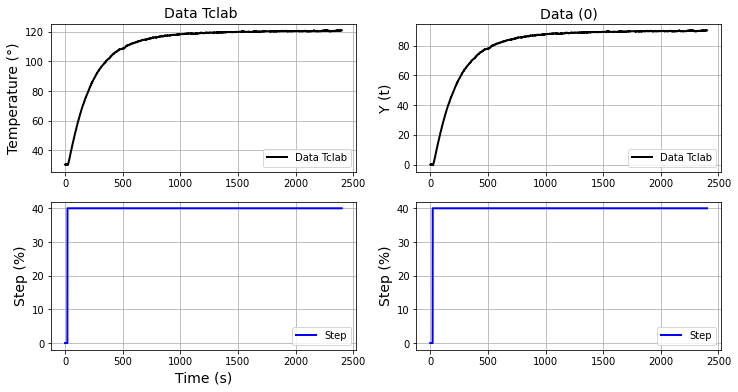

30.5


In [181]:
# Upload Data 
x =limites('DATA 1 OR 2 ?',1,2)

# Data
if x==1:
     data = np.loadtxt('25.txt',delimiter=',',skiprows=1)
elif x == 2:
     data = np.loadtxt('40.txt',delimiter=',',skiprows=1)


# Tclab Data
t1 = data[:,0].T 
u1 = data[:,1].T
y1 = data[:,2].T

# Y ---> Zero
Y_Zero = y1[0]
y2=y1-Y_Zero

# Z
Ze=20
Z = y1[Ze]

# Plot
plt.figure(figsize=(12,6))
 
# Subplot Data
ax=plt.subplot(2,2,1)
ax.grid()
plt.title("Data Tclab ",fontsize = 14)
plt.plot(t1, y1, 'k', linewidth=2, label='Data Tclab')
plt.ylabel('Temperature (°)', fontsize = 14)
plt.legend(loc='best')

ax=plt.subplot(2,2,2)
ax.grid()
plt.title("Data (0)",fontsize = 14)
plt.plot(t1, y2, 'k', linewidth=2, label='Data Tclab')
plt.ylabel('Y (t)', fontsize = 14)
plt.legend(loc='best')

# Subplot Step          
ax=plt.subplot(2,2,3)
ax.grid()
plt.plot(t1, u1, 'b-', linewidth=2, label='Step')
plt.ylabel('Step (%)', fontsize = 14)
plt.xlabel('Time (s)', fontsize = 14)
plt.legend(loc='best')

ax=plt.subplot(2,2,4)
ax.grid()
plt.plot(t1, u1, 'b-', linewidth=2, label='Step')
plt.ylabel('Step (%)', fontsize = 14)
plt.legend(loc='best')
plt.show()
print(Y_Zero)



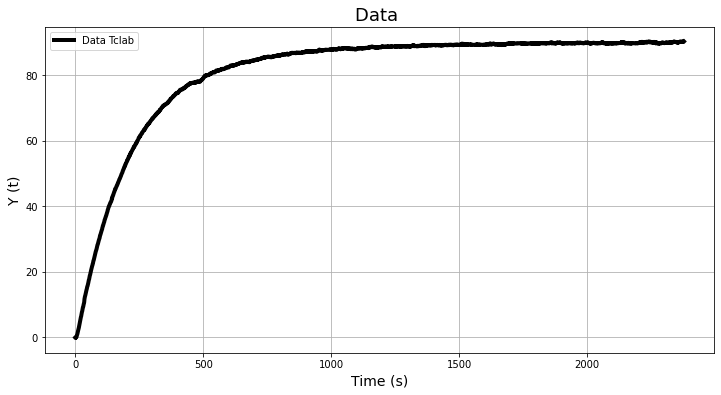

In [182]:
# Zero Step Time = 20 Seg
Zero = 20

# Simulation Time 
t0 = data[Zero:,0].T 
tf = len(t0) - 1
dt = 1
t = np.linspace(0,tf,int(tf/dt)+1)

# Vector Y (t)
y = y2[Zero:]

# Iterations
N=len(y)
       
plt.figure(figsize=(12,6))
plt.title("Data ",fontsize = 18)
plt.plot(t, y, 'k', linewidth=4, label='Data Tclab')
plt.ylabel('Y (t)', fontsize = 14)
plt.xlabel('Time (s)', fontsize = 14)
plt.legend(loc='best')
plt.grid()


**1:** 

Time of 60% Final Value = $\tau$

$t_s = 4\tau$

In [183]:
yf = 0
i1 = 0
i2 = 0
tau = 0


# Final Value
V = y[-1]

# 632% Final Value(Real)
V6 = 0.632*V

# Calculation of Tau and Settling time
for k in range(N):
    if(y[k]>=V6):
        tau = t[k]
        break
ts = 4*tau

# Final Value (Experimental)

for j in range(N-k):
    if(t[j]>ts):
        i1 = j+k
        yf = yf+y[i1]
        i2 = i2+1

# Final Y
yf = yf/i2

# Final U
if x==1:
     uf= 25
elif x == 2:
     uf = 40

# K 
Kf = (yf)/(uf)

print(f" K: {Kf} - Tau: {tau} - Tss: {ts}")

 K: 2.2366783452098273 - Tau: 223.0 - Tss: 892.0


Ge =     
  2.237
---------
223 s + 1

Mean Squared Error   =  0.3789
MAX Error            =  2.5965
Absolute Error       =  0.4889
Mean Absolute Error  =  0.3958


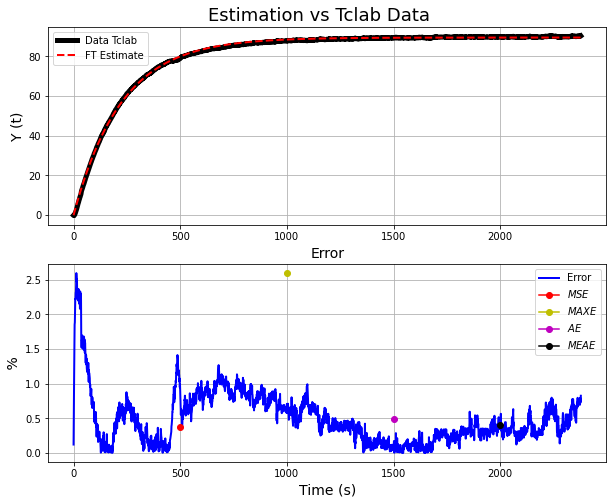

In [184]:
# Approximate Transfer Function:
Ge = control.tf([Kf],[tau,1])

# Step Response 
_,ye = control.step_response(Ge,t)

# Final Ye
if x==1:
     ye = ye * 25
elif x == 2:
     ye = ye * 40

# Error
e = np.abs(y - ye)

# Evaluation Criteria 
MSE = mean_squared_error(y[0:len(ye)], ye[0:len(ye)])
MAXE = max_error(y[0:len(ye)], ye[0:len(ye)])
MAE = mean_absolute_error(y[0:len(ye)], ye[0:len(ye)])
MEAE = median_absolute_error(y[0:len(ye)], ye[0:len(ye)])

print(f"Ge =     {Ge}")
print(f"Mean Squared Error   =  {MSE:.4f}")
print(f"MAX Error            =  {MAXE:.4f}")
print(f"Absolute Error       =  {MAE:.4f}")
print(f"Mean Absolute Error  =  {MEAE:.4f}")


# Plot
plt.figure(figsize=(10,8))

ax=plt.subplot(2,1,1)
ax.grid()
plt.title("Estimation vs Tclab Data   ",fontsize = 18)
plt.plot(t,y, 'k', linewidth=5, label='Data Tclab')
plt.plot(t,ye, 'r--'  , linewidth=2, label='FT Estimate')
plt.ylabel('Y (t)', fontsize = 14)
plt.legend(loc='best')

ax=plt.subplot(2,1,2)
ax.grid()
plt.title("Error",fontsize = 14)
plt.plot(t,e,  'b-'  , linewidth=2, label='Error')
plt.plot(500,MSE, marker="o", color="r",label=r'$MSE$')
plt.plot(1000,MAXE, marker="o", color="y",label=r'$MAXE$')
plt.plot(1500,MAE, marker="o", color="m",label=r'$AE$')
plt.plot(2000,MEAE, marker="o", color="k",label=r'$MEAE$')
plt.xlabel('Time (s)', fontsize = 14)
plt.ylabel(' % ', fontsize = 14)
plt.legend(loc='best')